<a href="https://colab.research.google.com/github/OnurKerimoglu/Colab_Notebooks/blob/master/Webscraping_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [7]:
!ls /gdrive/MyDrive/downloaded_images

rome_colloseum_images


In [8]:
import os 
from pathlib import Path
path = Path('/gdrive/MyDrive/downloaded_images/rome_colloseum_images')
os.listdir(path)

['urls.txt',
 'test_save_colosseum_0.jpg',
 'test_save_colosseum_1.jpg',
 'test_save_colosseum_3.jpg',
 'test_save_colosseum_4.jpg',
 'test_save_colosseum_5.jpg',
 'test_save_colosseum_6.jpg',
 'test_save_colosseum_7.jpg',
 'test_save_colosseum_8.jpg',
 'test_save_colosseum_9.jpg',
 'test_save_colosseum_10.jpg',
 'test_save_colosseum_11.jpg',
 'test_save_colosseum_13.jpg',
 'test_save_colosseum_14.jpg',
 'test_save_colosseum_15.jpg',
 'test_save_colosseum_16.jpg',
 'test_save_colosseum_17.jpg',
 'test_save_colosseum_18.jpg',
 'test_save_colosseum_19.jpg',
 'test_save_colosseum_20.jpg',
 'test_save_colosseum_21.jpg',
 'test_save_colosseum_22.jpg',
 'test_save_colosseum_23.jpg',
 'test_save_colosseum_25.jpg',
 'test_save_colosseum_26.jpg',
 'test_save_colosseum_27.jpg',
 'test_save_colosseum_28.jpg',
 'test_save_colosseum_29.jpg',
 'test_save_colosseum_30.jpg',
 'test_save_colosseum_31.jpg',
 'test_save_colosseum_32.jpg',
 'test_save_colosseum_34.jpg',
 'test_save_colosseum_35.jpg',
 'te

In [9]:
import skimage.io as io
from PIL import Image

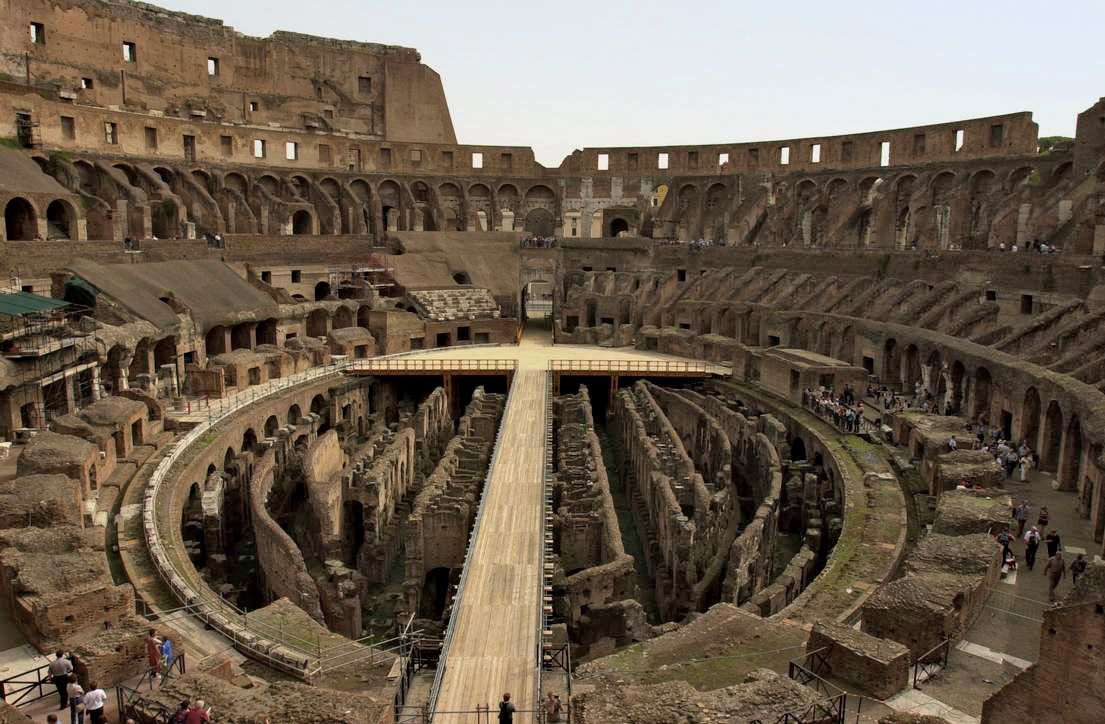

In [15]:
#example processing with one random line on the urls.txt
image_tensor = io.imread('https://cdn.britannica.com/03/98303-050-C8036C9D/Interior-Colosseum-Rome.jpg')
pil_image = Image.fromarray(image_tensor)
pil_image

In [16]:
pil_image.save(path / 'test_save_colosseum_l.jpg')

In [18]:
#Now loop over all images
with open(path/f'urls.txt', 'r') as f:
  image_urls = f.read().splitlines()
image_urls

['https://upload.wikimedia.org/wikipedia/commons/thumb/d/de/Colosseo_2020.jpg/1200px-Colosseo_2020.jpg',
 'https://www.history.com/.image/ar_4:3%2Cc_fill%2Ccs_srgb%2Cfl_progressive%2Cq_auto:good%2Cw_1200/MTkwODIxMzcwNDI5NDQ5OTEw/gettyimages-1081719544.jpg',
 'https://www.thecolosseum.org/wp-content/uploads/2017/09/colosseum-inside-optimized.jpg',
 'https://cdn.britannica.com/36/162636-050-932C5D49/Colosseum-Rome-Italy.jpg',
 'https://lp-cms-production.imgix.net/2020-11/GettyRF_597021401.jpg',
 'https://cdn.britannica.com/03/98303-050-C8036C9D/Interior-Colosseum-Rome.jpg',
 'https://media.tacdn.com/media/attractions-splice-spp-674x446/08/ba/a5/2c.jpg',
 'https://www.history.com/.image/ar_1:1%2Cc_fill%2Ccs_srgb%2Cfl_progressive%2Cq_auto:good%2Cw_1200/MTkwODIxMzcwNDI5NDQ5OTEw/gettyimages-1081719544.jpg',
 'https://res.cloudinary.com/dtpgi0zck/image/upload/s--DLEyRors--/c_fill,h_580,w_860/v1/EducationHub/photos/colosseum.jpg',
 'https://cdn.mos.cms.futurecdn.net/BiNbcY5fXy9Lra47jqHKGK.jpg'

In [ ]:
for i,url in enumerate(image_urls):
  print(f'trying: {url}', end=': ')
  break #this is to avoid re-downloading images when running all cells again
  try:
    image_tensor = io.imread(url)[:,:,:3] # We are only interested in the first three channels (4th migth be, eg., a transparency channel)
    pil_image = Image.fromarray(image_tensor)
    pil_image.save(path / f'test_save_colosseum_{i}.jpg')
    print('success.')
  except:
    print('failed, skipping.')
    continue

trying: https://upload.wikimedia.org/wikipedia/commons/thumb/d/de/Colosseo_2020.jpg/1200px-Colosseo_2020.jpg:success.
trying: https://www.history.com/.image/ar_4:3%2Cc_fill%2Ccs_srgb%2Cfl_progressive%2Cq_auto:good%2Cw_1200/MTkwODIxMzcwNDI5NDQ5OTEw/gettyimages-1081719544.jpg:success.
trying: https://www.thecolosseum.org/wp-content/uploads/2017/09/colosseum-inside-optimized.jpg:failed, skipping.
trying: https://cdn.britannica.com/36/162636-050-932C5D49/Colosseum-Rome-Italy.jpg:success.
trying: https://lp-cms-production.imgix.net/2020-11/GettyRF_597021401.jpg:success.
trying: https://cdn.britannica.com/03/98303-050-C8036C9D/Interior-Colosseum-Rome.jpg:success.
trying: https://media.tacdn.com/media/attractions-splice-spp-674x446/08/ba/a5/2c.jpg:success.
trying: https://www.history.com/.image/ar_1:1%2Cc_fill%2Ccs_srgb%2Cfl_progressive%2Cq_auto:good%2Cw_1200/MTkwODIxMzcwNDI5NDQ5OTEw/gettyimages-1081719544.jpg:success.
trying: https://res.cloudinary.com/dtpgi0zck/image/upload/s--DLEyRors--/c_

In [2]:
#Create Embeddings
# https://github.com/christiansafka/img2vec
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
import numpy as np

class Img2Vec():
    RESNET_OUTPUT_SIZES = {
        'resnet18': 512,
        'resnet34': 512,
        'resnet50': 2048,
        'resnet101': 2048,
        'resnet152': 2048,
    }

    def __init__(self, cuda=False, model='resnet-34', layer='default',
                 layer_output_size=512):
        """ Img2Vec
        :param cuda: If set to True, will run forward pass on GPU
        :param model: String name of requested model
        :param layer: String or Int depending on model.  See more docs: https://github.com/christiansafka/img2vec.git
        :param layer_output_size: Int depicting the output size of the requested layer
        """
        self.device = torch.device("cuda" if cuda else "cpu")
        self.layer_output_size = layer_output_size
        self.model_name = model

        self.model, self.extraction_layer = self._get_model_and_layer(model, layer)

        self.model = self.model.to(self.device)

        self.model.eval()

        self.scaler = transforms.Resize((224, 224))
        self.normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                              std=[0.229, 0.224, 0.225])
        self.to_tensor = transforms.ToTensor()

    def get_vec(self, img, tensor=False):
        """ Get vector embedding from PIL image
        :param img: PIL Image or list of PIL Images
        :param tensor: If True, get_vec will return a FloatTensor instead of Numpy array
        :returns: Numpy ndarray
        """
        if type(img) == list:
            a = [self.normalize(self.to_tensor(self.scaler(im))) for im in img]
            images = torch.stack(a).to(self.device)
            if self.model_name == 'alexnet':
                my_embedding = torch.zeros(len(img), self.layer_output_size)
            else:
                my_embedding = torch.zeros(len(img), self.layer_output_size, 1, 1)

            def copy_data(m, i, o):
                my_embedding.copy_(o.data)

            h = self.extraction_layer.register_forward_hook(copy_data)
            h_x = self.model(images)
            h.remove()

            if tensor:
                return my_embedding
            else:
                if self.model_name == 'alexnet':
                    return my_embedding.numpy()[:, :]
                else:
                    return my_embedding.numpy()[:, :, 0, 0]
        else:
            image = self.normalize(self.to_tensor(self.scaler(img))).unsqueeze(0).to(self.device)

            if self.model_name == 'alexnet':
                my_embedding = torch.zeros(1, self.layer_output_size)
            else:
                my_embedding = torch.zeros(1, self.layer_output_size, 1, 1)

            def copy_data(m, i, o):
                my_embedding.copy_(o.data)

            h = self.extraction_layer.register_forward_hook(copy_data)
            h_x = self.model(image)
            h.remove()

            if tensor:
                return my_embedding
            else:
                if self.model_name == 'alexnet':
                    return my_embedding.numpy()[0, :]
                else:
                    return my_embedding.numpy()[0, :, 0, 0]

    def _get_model_and_layer(self, model_name, layer):
        """ Internal method for getting layer from model
        :param model_name: model name such as 'resnet-18'
        :param layer: layer as a string for resnet-18 or int for alexnet
        :returns: pytorch model, selected layer
        """

        if model_name.startswith('resnet') and not model_name.startswith('resnet-'):
            model = getattr(models, model_name)(pretrained=True)
            if layer == 'default':
                layer = model._modules.get('avgpool')
                self.layer_output_size = self.RESNET_OUTPUT_SIZES[model_name]
            else:
                layer = model._modules.get(layer)
            return model, layer
        elif model_name == 'resnet-34':
            model = models.resnet34(pretrained=True)
            if layer == 'default':
                layer = model._modules.get('avgpool')
                self.layer_output_size = 512
            else:
                layer = model._modules.get(layer)

            return model, layer

        elif model_name == 'alexnet':
            model = models.alexnet(pretrained=True)
            if layer == 'default':
                layer = model.classifier[-2]
                self.layer_output_size = 4096
            else:
                layer = model.classifier[-layer]

            return model, layer

        else:
            raise KeyError('Model %s was not found' % model_name)

In [3]:
# Initialize Img2Vec without GPU
img2vec = Img2Vec(cuda=False)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [10]:
# put the embeddings in a fname:embedding dictionary
embeddings_dictionary = {}
imag_names = []
for index, imag in enumerate(os.listdir(path )):
  try:
    embeddings_dictionary[imag] = img2vec.get_vec(Image.open(path / imag))
    imag_names.append(imag)
  except:
    continue
  if index > 20: # comment this if statement to compute all embeddings for the folder
    break

In [11]:
from numpy import dot
from numpy.linalg import norm

#https://stackoverflow.com/a/43043160/45963
def cosine_similarity(a, b):
  return dot(a, b)/(norm(a)*norm(b))

In [12]:
from collections import defaultdict
# compute all pairwise similarites 
pairwise_similarities = defaultdict(dict)

for image_name, vector in embeddings_dictionary.items():
  for image_name_2, vector_2 in embeddings_dictionary.items():
    pairwise_similarities[image_name][image_name_2] = cosine_similarity(vector, vector_2)

In [14]:
import matplotlib.pyplot as plt
# utility function to show images side to side
def show_pair(imag_a, imag_b): 
  plt.subplot(121)
  plt.imshow(np.array(imag_a))
  plt.axis("off")
  
  plt.subplot(122)
  plt.imshow(np.array(imag_b))
  plt.axis("off")

cosine similarity: 0.7650302052497864


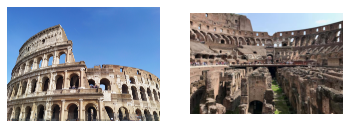

In [49]:
#@title Choose image pair {run: 'auto'}
fig_i = 11 #@param{type: "slider", min:0, max:20}
fig_i2 = 20 #@param{type: "slider", min:0, max:20} 
cos_sim_value = pairwise_similarities[imag_names[fig_i]][imag_names[fig_i2]]
print(f'cosine similarity: {cos_sim_value}')
show_pair(Image.open(path/imag_names[fig_i]),
          Image.open(path/imag_names[fig_i2]))